# All the function setup

In [1]:
#import all the modules necessary to finish the assignment
import time
import matplotlib.pyplot as plt
import numpy

def replaceandlowercase(string):
    """
    This function will replace bad characters in the strings such as puntuations, 
    numbers, and some commonly seen words. We also want them to become lowercase for comparison.
    -
    Input: 
        - string: a str that we want to replace bad characters with
    Output:
        - string: the str after reaplcement and transformation into lowercase.
    
    """
    #Transform into lowercase
    string = string.lower() 
    #Replace bad characters
    string = string.replace(",","").replace(".",'').replace("1",'').replace("2",'').replace("3",'').replace("4",'').replace("5",'').replace("6",'').replace("7",'').replace("8",'').replace("9",'').replace("0",'').replace("that",'').replace("the ",'').replace("a ",'').replace("an ",'').replace("\n",'').replace("\ufeff",'').replace("!", "").replace("?", "").replace("'", "").replace('"', "").replace(";", "").replace("-","").replace(" ","")
    return string 

In [2]:
def plag_distribution(x,h1,k):
    """
    This function will plot the graph for the plagiarism distribution to see which part of the string is plagiarised.
    -
    Input:
        - x: The string we want to investigate
        - h1: A tuple with the results that contains both the indices of the plagiarised substrings and the hashtable
        - k: The length of the substring
    Output: 
        - A diagram showing the distribution of plagiarism within a string.
    """
    
    %matplotlib inline
    #create a dictionary to store the number of plagiarism at each character
    dict = {}

    #create a loop to initialize the dictionary
    for i in range (len(x)-k+1):
        dict[i] = []
    
    #Create a for loop to put the plagiarism indices to the cooreponsding position in the dictionary
    for i in h1[0]:
        n = i[0] #the indices
        #Add the tuple to the cooresponding position in the dictionary
        dict[n].append(n) 

    #Change the key stored in dictionary into frequency
    for i in dict:
        dict[i] = len(dict[i])

    #create a list to store the frequency
    yaxis = []
    #create a list to store the character orders
    xaxis = [i for i in range(len(dict))]

    for i in dict:
        yaxis.append(dict[i])

    #plot out the distribution diagram
    plt.plot(xaxis, yaxis, label = "Number of Plagiarism Detection")
    plt.xlabel('Character Order')
    plt.ylabel('Number of Plagiarism Detection')
    plt.title('Dectection Distribution')
    plt.legend()
    plt.show()

In [3]:
import random

def get_random_string(length):
    """
    This function creates a string by selecting characters randomly from a sample set of letters
    - 
    Input:
        - length: An interger determining the length of the string
    Output:
        - result_string: A string of length "length"
    """
    sample_letters = 'abcdefghijklmnopqrstuvwxyz'
    result_string = ''.join((random.choice(sample_letters) for i in range(length)))
    return result_string

# Question 1: Rolling Hashing


In [4]:
def initial_hashvalue(string, base, q):
    """
    Find the hash value for the first substring
    
    Input:
        - string: the string of word that we want to convert to integers
        - base: how we want to convert a string to integers
        - q: the size of the hash table, a prime number
    
    Output:
        - value: the hash value of a character
    """
    #break down the string into characters
    str_lst = list(string)
    
    #set the initial hash value to 0
    value = 0

    #create a variable to scale the base by power 
    n = 0 
    
    #Calculate the Hash Value as the ordinal value of a character scaled by a the power of a assigned base
    #For exmaple: "App" will be ord("A")*base**1+ord("p")*base**2+ord("p")*base**3
    
    for i in range(len(str_lst)-1,-1,-1):
        value += ord(str_lst[i])*base**n
        n +=1
    
    #hash function using the division method. Take the remainder with %
    value %=q
    
    return value


    
def add_character(value,base,newchar,q):
    """
    This function calculate the hash value when we add a character to a string
    -
    Input:
        - value: Hash value of the original string
        - base: the base that we set for the scaling 
        - newchar: the character that we want to add
        - q: The size of the hashtable
        
    Output:
        - new_value: hash value after adding the character to a string
    """
    #Follow the formula in the handout
    new_value = (value*base+ord(newchar))%q
    return new_value

def del_character(value,string,base,char_del,q):
    """
    This function calculate the hash value when we delete a character from a string
    -
    Input:
        - value: Hash value of the original string
        - string: the cuurent string that we have, needed to calculate the length of the srting
        - base: the base that we set for the scaling 
        - char_del: the character that we want to delete
        - q: The size of the hashtable
        
    Output:
        - new_value: hash value after deleting the character from a string
    """
    
    #Follow the formula in the handout    
    new_value = (value - ord(char_del)*(((base**(len(string)-1))%q)))%q
    return new_value

def newvalue(string,base,newchar,q,char_del,hashvalue):
    """
    This function combines the addition and deletion and calculate the value after one rolling
    -
    Input:
        - string: the cuurent string that we have, needed to calculate the length of the srting
        - base: the base that we set for the scaling 
        - newchar: the character that we want to add
        - q: The size of the hashtable
        - char_del: the character that we want to delete
        - hashvalue: The hashvalue of the previous string
        
    Output:
        - new_value: hash value after deleting the character from a string
    """
    value = add_character(hashvalue,base,newchar,q)
    string += newchar
    new_value = del_character(value,string, base,char_del,q)
    return new_value
    
def rh_get_match(x,y,k,q):
    """
    This function take two strings and indentify the common substring of length k
    - 
    Input: 
        - x: student A submission string
        - y: student B submission string
        - k: the legnth of interest
        - q: the size of the hash table
    
    Output: There are three possible output
        - (indiceslist,hashtable): A tuple with (1) the indeiceslist will 
            return the list of indices where there is common substring and (2)the hashtable
        - "Great no plagiarism": when there is no plagiarism at all
        -"Need a longer string": When the string is not long enough
        
    """
    #if the length of the string is shorter than the required substring length
    if len(y) <k or len(x) < k:
        return "Need a longer string"
    
    
    #replace bad characters and make lowercase
    x = replaceandlowercase(x)
    y = replaceandlowercase(y)
    
    #create an initialize a hash table
    hashtable = {}
    for i in range(q):
        hashtable[i] = None

    #take the first substring of length k for x and y 
    x_string = x[0:k]
    y_string = y[0:k]
    
    #create the hash value of the first substring and store it in the hashtable
    hashtable[initial_hashvalue(x_string,1000,q)] = [(x_string,0)]
    
    #create the variable to store the working hash value
    new_value = initial_hashvalue(x_string,1000,q)
    
    #loop through each substring to calcualte their hash value and store them into the hashtable
    for n in range(k,len(x),1):
        
        temp = newvalue(x_string,1000,x[n],q,x[n-k],new_value)
        new_value = temp
        
        #Here we perform the rolling add/delete character 
        x_string += x[n]
        x_string = x_string[1:]
        
        #Store the hash value in the hash table by chaining 
        if hashtable[new_value] is None:
            hashtable[new_value] = [(x_string,n-k+1)]
        else:
            hashtable[new_value].append((x_string,n-k+1))
    
    
    #Here Starts the Lookup!
    
    #First, if the length of y is smaller or equal to k, 
    #which means that there is only one substring,
    #we just take the initial hash value of y and see 
    #whether there is an exisitng key stored in that hash value
    
    if len(y) <= k:
        #create a list to store the indices
        indiceslist = []
        #initialize the hash value for the y string
        new_value = initial_hashvalue(y_string,1000,q)
        
        #See whether there is anything stored in the hash value
        if hashtable[new_value] is None:
            return "Great no plagiarism"
        else:
            #If so, check whether the specific substring is within the list
            for s in hashtable[new_value]:
                if s[0] == y_string:
                    #if so, append the indices
                    indiceslist.append((s[1],0))
                    
            return (indiceslist,hashtable)
    
    #If the length of y is bigger than k:
    #We will iterate through the substring
    else: 
        indiceslist = []
        new_value = initial_hashvalue(y_string,1000,q)
        
        #first look up the first substring
        if hashtable[new_value] is None:
            print("")
        else:
            for s in hashtable[new_value]:
                    if s[0] == y_string:
                        indiceslist.append((s[1],0))
        
        #Loop through the rest of the substrings by rolling hashing
        for m in range(k,len(y),1):
            temp = newvalue(y_string,1000,y[m],q,y[m-k],new_value)
            new_value = temp
            
            #Here we perform the rolling add/delete character 
            y_string += y[m]
            y_string = y_string[1:]
            
            #if there isn't anything stored in that value, conitnue to the next substring
            if hashtable[new_value] is None:
                continue
            else:
                #if there is, look up the indices and store it in the list
                for s in hashtable[new_value]:
                    if s[0] == y_string:
                        indiceslist.append((s[1],m-k+1))
        
        if len(indiceslist) == 0:
            return "no overlapping substring"
        else:
            return (indiceslist,hashtable)
    

## Test Section

## Test 1-1: The standard one

In [5]:
x= "today is Monday"
y= "day"
k = 3
q = 7
print(rh_get_match(x,y,k,q))

([(2, 0), (10, 0)], {0: [('tod', 0)], 1: [('ism', 5)], 2: [('nda', 9)], 3: [('oda', 1), ('mon', 7), ('ond', 8)], 4: [('ayi', 3)], 5: [('day', 2), ('yis', 4), ('smo', 6), ('day', 10)], 6: None})


## Test 1-2: A longer Test

When there is some Plagiarism (but mostly paraphrased)
level of plagiarism: 0.2537313432835821
level of collision: 0.18556701030927836


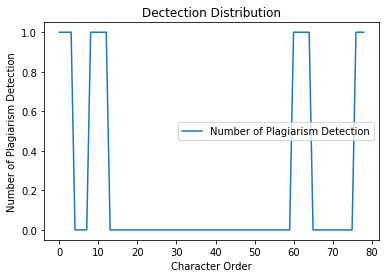



When there is direct Plagiarism
level of plagiarism: 1
level of collision: 0.18556701030927836


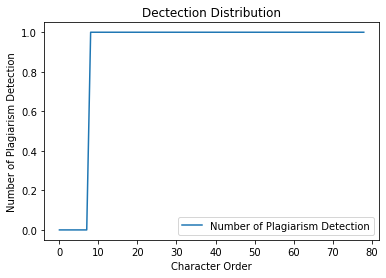



When someone only deletes some words and swap the positions
level of plagiarism: 0.9552238805970149
level of collision: 0.18556701030927836


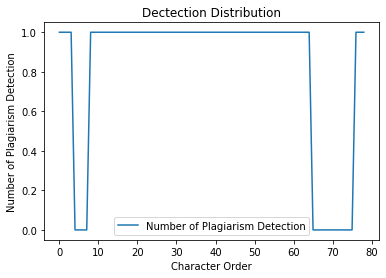

In [6]:
x = "On monday, President Tsai announced that the government will start to implement the bilingual country project."
y = "President stated that they are going to begin to work on the bilingual state project on Monday." 
z = "President Tsai announced that the government will start to implement the bilingual country project."
m = "President Tsai announced the government will start to implement the bilingual project, On monday"
x = replaceandlowercase(x)
y = replaceandlowercase(y)
z = replaceandlowercase(z)
m = replaceandlowercase(m)
k = 5
q = 97
h1=  rh_get_match(x,y,k,q)
h2=  rh_get_match(x,z,k,q)
h3=  rh_get_match(x,m,k,q)


##Test1-2-1
##When there is some Plagiarism (but mostly paraphrased)
print("When there is some Plagiarism (but mostly paraphrased)")
print("level of plagiarism:",min(len(h1[0])/(len(y)-k+1),1))

#This is to calculate the number of collisions 
count = 0
lst = []
for i in h1[1]:
    if h1[1][i] is not None:
        if len(h1[1][i])>1: #if there is more than one key stored in the value
            lst.append(h1[1][i])
            count +=1

print("level of collision:",(min(count/q,1)) )
plag_distribution(x,h1,k) 
print("\n")

##Test1-2-2
##When there is direct Plagiarism
print("When there is direct Plagiarism")
print("level of plagiarism:",min(len(h2[0])/(len(y)-k+1),1))

count = 0
lst = []
for i in h2[1]:
    if h2[1][i] is not None:
        if len(h2[1][i])>1:
            lst.append(h2[1][i])
            count +=1

print("level of collision:",min(count/q,1) )
plag_distribution(x,h2,k)
print("\n")

##Test1-2-3
##When there is Quite a lot of Plagiarism 
print("When someone only deletes some words and swap the positions")
print("level of plagiarism:",min(len(h3[0])/(len(y)-k+1),1))

count = 0
lst = []
for i in h3[1]:
    if h3[1][i] is not None:
        if len(h3[1][i])>1:
            lst.append(h3[1][i])
            count +=1

print("level of collision:",min(count/q,1) )
plag_distribution(x,h3,k) 


## Test 1-3:  A  Lyrics Test (from a downloaded file)

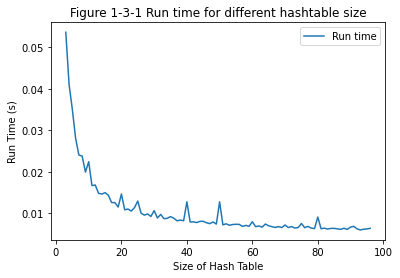

level of plagiarism: 0.06951102588686481
level of collision: 1


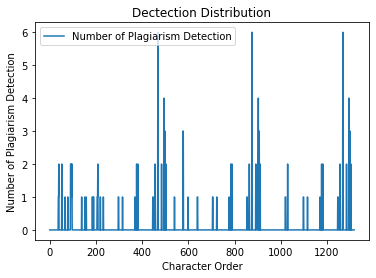

In [7]:
f1 = open("Born to die.txt").read()
x =replaceandlowercase(f1)
f2 = open("Off to the races.txt").read()
y = replaceandlowercase(f2)
k = 5


#This Part is to create figure 1-3-1 to see what the running time would be for different hashtable size
timelst= []
for q in range(3,97):
    begin = time.time()
    h1 = rh_get_match(x,y,k,q)
    timelst.append(time.time()-begin)

xaxis = [i for i in range (3,97)]
plt.plot(xaxis, timelst, label = "Run time")
plt.xlabel('Size of Hash Table')
plt.ylabel('Run Time (s)')
plt.title('Figure 1-3-1 Run time for different hashtable size')
plt.legend()
plt.show()

#Actually start detecting 
q = 20
print("level of plagiarism:",len(h1[0])/(len(y)-k+1))
count = 0
lst = []

#Calculate the number of collisions
for i in h1[1]:
    if h1[1][i] is not None:
        if len(h1[1][i])>1:
            lst.append(h1[1][i])
            count +=1

# We are testing if there is any collision. If this returns 0, 
# then there is no collision. The number will show the level of collision 
print("level of collision:",min(count/q,1)) 

plag_distribution(x,h1,k)  


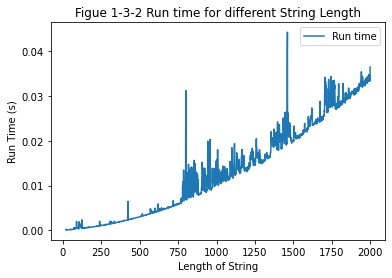

In [8]:
#This part is to create 1-3-2 to see the run time for different string lengths 
k = 5
q = 7
timelst= []
for i in range(20, 2000):
    x = get_random_string(i)
    y = get_random_string(i)
    begin = time.time()
    h1 = rh_get_match(x,y,k,q)
    timelst.append(time.time()-begin)

xaxis = [i for i in range (20, 2000)]
plt.plot(xaxis, timelst, label = "Run time")
plt.xlabel('Length of String')
plt.ylabel('Run Time (s)')
plt.title('Figue 1-3-2 Run time for different String Length')
plt.legend()
plt.show()

## Test 1-3-2 : Which is the best q
In this section, I will discuss what is the best q for the rolling hashing function. The criteria for choosing a q will be determined by the tradeoff between time space complexity. If we increase the q, then we will have a bigger hash table, which means that there could be fewer collisions. As we experimented in Test 1-2, we see that when q=7, the level of collision is 0.91 and when we increase q to q=97, the level of collision is 0.19, which means that increasing q, increasing the size of the hashtable, will reduce collisions, and making sure that the lookup time complexity will be close to O(1). However, creating a bigger size table will also take up more space. So we experiment with longer text in Test 1-3 to see whether a small q (q=7) will result in longer time. We see that for a text that has around 2000 possible substrings, the run time for q=7 would be 0.07 while the run time for q = 97 would be 0.01. We can see that as q increases, the run time would decrease exponentially. According to the Figure 1-3-1, we will se the q to 20 as that is when there is a biggest gain of time (complexity) saved vis-a-vis the size (space complexity) increased. If the substring is longer (as shown in the Figure 1-3-2), we can also set a thershold that adjust the q according to the lengths to mitigate for the increased run time caused by collisions.

# Question 2 - Another Hash Function

## Explanation of the choice of Hash Function
In this version, the Hash funtion is: the sum of ord(character)$*6^n$ (n range from 1 to k)

The reason I choose this is because I do not want to have too many collisions in this method. By scaling the ordinal value of character by $6^n$, I am able to make sure that strings with similar character such as "app" and "pap" and "ppa" would have different hash value. In the following session, I also tested how many collisions there are for different string size. 

Another reasonn I chose this is to improve the problem that division method has: which is that the lack of uniformly distributed probability for each key because the problem with different keys but same value come up more often according to the guideline presented in the handout. This hash function will ensure that each value has a uniform probablility to get any hashvalue. 

The data structure that I have used in this function is dictionary and list. The reason I chose dictionary is because of the quick look up time of O(1) (when there is no collisions, which we have tried to achieve through the scaleing ordinal values with different bases as discussed above). Within the dictionary, I decided to use chaining instead of the open addressing method because we are told to not use the division method in the hash function, which the open addressing method would require. For chaining, I decided to use list because it would be the easiest way to store and add values if there are any collisions. 

In terms of the hash table size: I decided to trade space complexity and time complexity for the collision resolution. In short, I decide to increase the size of the hash table to make sure that there is enough space that will lead to fewer collisions. As for the time complexity, as we decide to increase the size of the hashtable, we will see an delta_base^k increase in the time complexity. The time complexity spent in the creation of the hashtable can eventually pay off when we are comparing values in the detection part. I will discuss more of this in the Section Test 4-2 below. 



In [9]:
def hashvalue(string,base):
    """
    Find the hash value for the substrings
    
    Input:
        - string: the string of word that we want to convert to integers
        - base: an integer to determine the scaling factor
    Output: 
        - value: The hash value of the string 
    """
    #break down the string into characters
    str_lst = list(string)
    
    #set the initial hash value to 0
    value = 0

    #create a variable to scale the base by power 
    n = 1
    
    #Calculate the Hash Value as the ordinal value of a character scaled by a the power of a assigned base
    #For exmaple: "App" will be ord("A")*base**1+ord("p")*base**2+ord("p")*base**3
    for i in range(len(str_lst)-1,-1,-1):
        value += ord(str_lst[i])*base**n
        n+=1
    
    return value

    
def regulargetmatch(x,y,k,base):
    """
    Input: 
        - x: student A submission string
        - y: student B submission string
        - k: the legnth of interest
        - base: an integer to determine the scaling factor
    """
    #if the length of the string is shorter than the required substring length
    if len(y) <k or len(x) < k:
        return "Need a longer string"
    
    #replace bad characters and make lowercase
    x = replaceandlowercase(x)
    y = replaceandlowercase(y)

    #create and initialize a hash table with the size that include all possible combination of characters
    hashtable = {}
    lowerrange = 0
    upperrange = 0
    for i in range(1,k+1,1):
        lowerrange += ord("a")*base**i
        upperrange += ord("z")*base**i
    for j in range(lowerrange,upperrange+1):
        hashtable[j] = None
        
    
    #loop through each substring to calcualte their hash value and store them into the hashtable
    for n in range(k,len(x)+1,1):
        x_string = x[n-k:n]
        new_value  = hashvalue(x_string,base)
        
        #Store the hash value in the hash table by chaining 
        if hashtable[new_value] is None:
            hashtable[new_value] = [(x_string,n-k)]
        else:
            hashtable[new_value].append((x_string,n-k))
    
    
    
    #Here Starts the Lookup!
    
    #First, if the length of y is smaller or equal to k, 
    #which means that there is only one substring,
    #we just take the initial hash value of y and see 
    #whether there is an exisitng key stored in that hash value

    indiceslist = []
    
    if len(y)==k:
        new_value = hashvalue(y,base)
        if hashtable[new_value] is None:
            return "no overlapping substring"
        else:
            for s in hashtable[new_value]:
                if s[0] == y:
                    indiceslist.append((s[1],0))
        
    #If the length of y is bigger than k:
    #We will iterate through the substring
    else:
        
        #Loop through each of the substrings
        for m in range(k,len(y)+1,1):
            y_string = y[m-k:m]
            new_value = hashvalue(y_string,base)
            if hashtable[new_value] is None:
                continue 
            else:
                for s in hashtable[new_value]:
                    if s[0] == y_string:
                        indiceslist.append((s[1],m-k))

    if len(indiceslist) == 0:
        return "no overlapping substring"
    else:
        return (indiceslist, hashtable)

## Test Section 

## Test 2-1: Short Test

In [10]:
x= "today is Monday"
y= "day"
k = 3
base = 6
regulargetmatch(x,y,k,base)[0]

[(2, 0), (10, 0)]

## Test 2-2: Senetence Test

Time it took to run (s): 0.03996086120605469
level of plagiarism: 0.2537313432835821
level of collision: 0.0


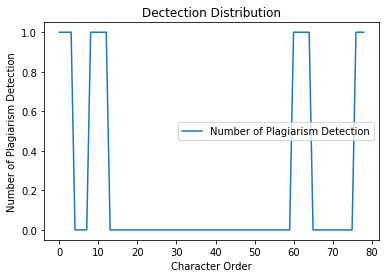

In [11]:
######################
####Senetence Test####
######################

x = "On monday, President Tsai announced that the government will start to implement the bilingual country project."
y = "President stated that they are going to begin to work on the bilingual state project on Monday" 
x = replaceandlowercase(x)
y = replaceandlowercase(y)
k = 5
base = 6

begin = time.time()
h1 = regulargetmatch(x,y,k,base)
print("Time it took to run (s):",time.time()-begin)
print("level of plagiarism:",len(h1[0])/(len(y)-k+1))


#Identify the number of collisions
count = 0
lst = []
for i in h1[1]:
    if h1[1][i] is not None:
        if len(h1[1][i])>1:
            lst.append( h1[1][i])
            count +=1

# We are testing if there is any collision. If this returns 0, 
# then there is no collision. The number will show the level of collision 
print("level of collision:", count/(len(x)-k+1))

plag_distribution(x,h1,k)  

## Test 2-3: Lyrics Test

Time it took to run (s): 0.09225106239318848
level of plagiarism: 0.06951102588686481
level of collision: 0.21986353297952996


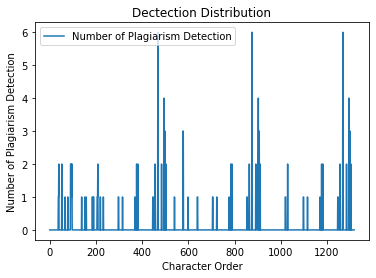

In [12]:
######################
#####Lyrics Test######
######################

f1 = open("Born to die.txt").read()
x = replaceandlowercase(f1)
f2 = open("Off to the races.txt").read()
y = replaceandlowercase(f2)
k = 5
base = 6

begin = time.time()
h1 = regulargetmatch(x,y,k,base)
print("Time it took to run (s):",time.time()-begin)
print("level of plagiarism:",len(h1[0])/(len(y)-k+1))

#identify the level of collisions
count = 0
lst = []
for i in h1[1]:
    if h1[1][i] is not None:
        if len(h1[1][i])>1:
            lst.append( h1[1][i])
            count +=1


# We are testing if there is any collision. If this returns 0, 
# then there is no collision. The number will show the level of collision 
print("level of collision:",count/(len(x)-k+1)) 


plag_distribution(x,h1,k)  


# Question 3: Talk about what does plagiarism mean
## 3-1 What kind of plagiarism can my two versions detect
### Plagiarism Percentage
In this assignment, we take the substring matching approach to detect plagiarism, which means that we will determine a length of common substring (k) and investigate how many common substrings exist in the two texts compared to the total number of substring possible given the two texts.

For example: If we have 
- x: "Today is Monday"
- y: "day"
- k: 3

Then we will see how much of substring of length 3 in y exists within x as compared to the total possible number of substring in y. If this proprotion exceeds a certain percentage (threshold), then we classify it as plagiarism. This threshold can be determined by the users as each field might use different words. For example, in science, the common appearance of "hypothesis" might not mean any plagiarism depite the number of time where two scientific paper overlaps.

In this assignment, I decide to use 5 as the length of substring (k=5) because the average length of English word is 4.7. This would also be useful because we want to avoid situation where the ending characters and beginning characters of two words to form another few-character word that acutally doesn't come up in the original text. For example, if we have two words "that odd man" has a "tod" substring in it, which means that if there is "today" in another text, we will likely have more substring identified as plagiarism when it's not. 

Moreover, we are trying to avoid having articles and commonly seen words to increase the level of false plagiarism. So in the function replaceandlowercase( ), arabic numbers and articles such as "a," "the," "that", "an",  are deleted from the text. As there are too many other commonly seen words, I wrote the replacement process into a function that can be easily updated and be applied to all the strings.  

### Plagiarism distribution
**Another add-on** that will help improve the correction rate of the detector is looking at the plagiarism distribution. For example, in a long article, perhaps only 1 out of 100 paragrpah commits plagiarism. However, if we run the whole article with only the plagiarism rate method, we will not be able to identify because the majority of the article is fine. Thus, we are looking at where the plagiarism happens. By plotting out where plaigiarsm are distributed, we can then decide that a small portion of the text is plagiarised if a dense distribution shows in a certain portion of the text.

For example: 
- X: "President Tsai will help Taiwan become an independent country. However, a lot of poeple don't really like her."
- Y: "President Tsai will help Taiwan become an independent country. Therefore, we should all praise her."

If we run the code below: we will see that the distribution of plagiarism densly happens in the first portion of the string. As we see, we can investigate further in that portion and determine whether there is plagiarism. Desipte the low plagiarism rate, we can see that in a particular portion, there is strong plagiarism. 

level of plagiarism: 0.21212121212121213


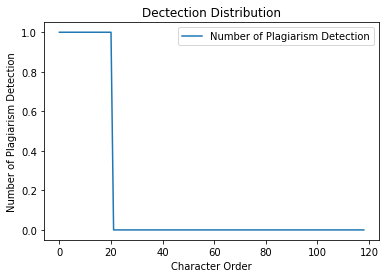

In [13]:
x = "President Tsai will help Taiwan. We think that she is an amazing professor. Students love her and think that she is amazing. However, a lot of poeple don't really like her."
y = "President Tsai will help Taiwan become an independent country. Therefore, we should all praise her. Omg, look at the way that she looks at you"
x = replaceandlowercase(x)
y = replaceandlowercase(y)
k = 5
q = 7
h1=  rh_get_match(x,y,k,q)
print("level of plagiarism:",min(len(h1[0])/(len(y)-k+1),1))
plag_distribution(x,h1,k)  


## 3-2 What kind of plagiarism can this not detect (limitation)
Despite the algorithm design choice that I included to account for the real-life application of plagiarism detection, there are still a number of challenges that these two version of detector are not able to address due to the nature of "substring matching". The main important once include:

1. Substring matching method cannot account for paraphrasing (see Test 1-2-1 for example). When we paraphrase words such as "start" to "begin" or "will" to "am going to", the level of plagiarism decreased drastically although the meaning of the sentence is still the same. However, from test 1-2-3, we can see that what the substring matching can detect is when someone one only deletes or swap the words.

2. Substring matching cannot tell the plagiarims of ideas either. Similar to the problem with paraphrasing, if someone rewrites the whole paragraph in their own words, it will be practically impossible to detect plagiarism.

3. Yet another challenge is that this detector might falsely identified two sentences with different meanings but same words as plagiarism. For example, "Let's Eat, Grandma" and "Let's eat grandma" means totally different things, but the substring would not consider any punctuations. Geneally, when it comes to semantic, substring matching method is rather limited. 

# Question 4: 
Discuss the time complexity of each algorithmic version. Compare and contrast the two versions by
experimenting on self-generated inputs. You are encouraged to generate inputs of various natures as that
would be more likely to tease out the strengths and/or weaknesses of the versions.

## Test 4-1: Testing the time complexity of the regular hash function
My hash function is **the sum of ord(character)$*2^n$ (n ranges from 1 to k)**.

Originally, I set the base for my hash function to 10 so that there would be practially no collisions. However, as I increased the number of substring-length (from 3 to 10), I found that the code takes longer to run. As such, I decide to investigate to see what would be the tradeoff between the base(which has a negative relationship with the degree of collision) and time complexity with different substring lengths.

In [14]:
#This is to test the time complexity for different base 
#We set the base: 2-10
#We also set the length of string k from 3-6

timelist = []

for k in range(3,7):
    for base in range(2,11):
        lowerrange = 0
        upperrange = 0
        hashtable = {}
        for i in range(1,k+1,1):
                lowerrange += ord("a")*base**i
                upperrange += ord("z")*base**i

        start = time.time()
        for j in range(lowerrange,upperrange+1):
            hashtable[j] = None
        timelist.append((base,k,time.time()-start))

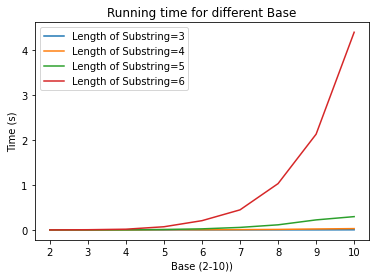

In [15]:
k = list(range(2,11))
for i in range(4):
    lst = []
    for j in timelist[9*(i): 9*(i)+9]:
        lst.append(j[2])
    
    plt.plot(k, lst, label = "Length of Substring={}".format(i+3))

plt.xlabel('Base (2-10))')
plt.ylabel('Time (s)')
plt.title('Running time for different Base')
plt.legend()

According to the experiment results (graph), we can decide whether we want to have a large base, which will have fewer collisions but comes with higher time complexity as we increase the length of the substring. If we want to use a smaller substring (<4), we can use bigger base (10), which will guarantee fewer collision, but also means more space complexity as we have to create a hash table that includes all the possible hash values for all the possible combination for characters.

In this assignment, we will use 5 as the length of substring because the average length of English word is 4.7 (citations). According to the graph, this means that we can use up to the base of 6 without creating a big problem asymptotically speaking. We test this back to the original function and found that there is no collisions, without taking a long time to run, which means that my choice is appropriate.

## Test 4-2 Comparing the Time/Space Complexity of two hash functions
In this test, I will test the time complexity of the two hash functions with 
- Different legnths of text
- Different substring lengths specified.  

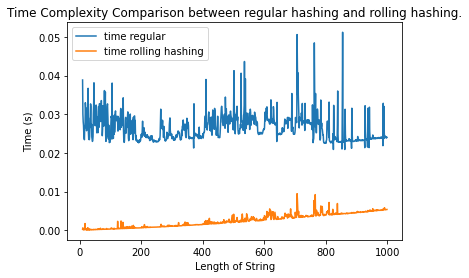

In [16]:
#####Different legnths of text
k = 5

#Create a list to store the time for different method
time_regular = []
time_rh = []
x_axis = []

#Input for the regular get match
base = 6
#Input for the rolling hashing get match
q = 20 

#Calculate the time it takes for different lengths and store them in the list
for i in range(10,1000):
    x_axis.append(i)
    x = get_random_string(i)
    y = get_random_string(i)
    
    begin = time.time()
    h1 = regulargetmatch(x,y,k,base)
    time_regular.append(time.time()-begin)
    
    begin = time.time()
    h2 = rh_get_match(x,y,k,q)
    time_rh.append(time.time()-begin)
    
#plot it out
plt.plot(x_axis,time_regular, label = "time regular")
plt.plot(x_axis,time_rh, label = "time rolling hashing")
plt.title("Time Complexity Comparison between regular hashing and rolling hashing.")
plt.xlabel("Length of String")
plt.ylabel("Time (s)")
plt.legend()

We can see from this result that both method seem to have the same asymptotic beahvior, which is O(n). However, we also see that, with the same asymptotic beahvior, rolling hashing still requires less time than regular hashing method. This can be sttributed to the fact that it requires less time to calculate the hash value with rolling method.  

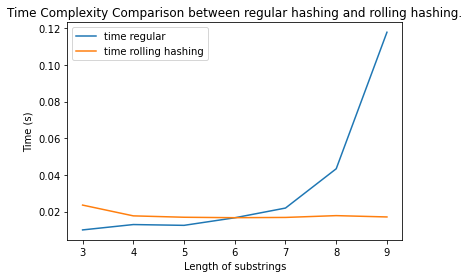

In [17]:
####Different legnths of Substring

#Create a list to store the time for different method
time_regular = []
time_rh = []
x_axis = []

#Input for the regular get match. 
#Here I decreased the base because we see in Test 4-1 that 
#it will take increasingly more time as the length of substring increases
base = 3 

#Input for the rolling hashing get match
q = 20 


#Create two strings randomly 
x = get_random_string(2000)
y = get_random_string(2000)


#Calculate the time to run and store them in the list
for k in range(3,10):
    x_axis.append(k)
    
    begin = time.time()
    h1 = regulargetmatch(x,y,k,base)
    time_regular.append(time.time()-begin)
    
    begin = time.time()
    h2 = rh_get_match(x,y,k,q)
    time_rh.append(time.time()-begin)
    
#Plot it out!
plt.plot(x_axis,time_regular, label = "time regular")
plt.plot(x_axis,time_rh, label = "time rolling hashing")
plt.title("Time Complexity Comparison between regular hashing and rolling hashing.")
plt.xlabel("Length of substrings")
plt.ylabel("Time (s)")
plt.legend()

From this test, we can see that rolling hashing performs much better asymptotically compared to the regular hashing, with rolling hashing performing with constant time complexity and regular hashing seeing exponential time complexity. We can see that if we want to have longer susbtring test, trolling hashing would be the more ideal version.

Regarding the space complexity, I will discuss theoretically:
In rolling hashing, the size of the table is much smaller than that in the hash table with regular hash function. This is because in the regular hashing, we are trying to make sure that we can reduce the number of collision by creating a hash function that are likley to produce a uniqe hash value for each input, which requires a lot more space complexity. However, I also tried to reduce the space complexity as discused in test 4-1 by choosing an optimal base for to scale the ordinal value of each character.

# Question 5: HCs and LOs

### #DataStructures and #TimeComplexity:
In this assignment, I elaboately explained and justified my choice of designing the hash table (hash table size, the use of different method and how to solve the collisions) through theoretical discussion as well as experimental results about time and space complexity. Moreover, I also took the feedback that I got from the previous trie assignment about using dictionary instead of a list to improve the look up time. 

Overall, throughout the semester, I have become better at applying this LO through a more elaborate discussion of the reason for choosing the data structure. 

### #ComputationanlCritique and #rightproblem:
I am able to define the computatioanl problem that we aer addressing (plagiarism) and clearly explained the extent that our method can solve this problem to and the contraints of the methods. I also provide an creative solution with the plagiarism distribution to account for the goal state that we will want to see in real-life application of plagiarism detector.

Throughout this assignment, I first proactively ieterated on each of the two method to identiy the factors (q, base, k, etc) that would contribute to the subtoptimal performance (time complexity, collisions, etc) of the algorithm and locally optimzie the solution for each method and then comparing the performance of the two methods and explain the differences in performance in terms of the time and space resource required. 

Overall, I have tried to imrpove the use of these LO by clearly defining the ocmputational problem and provide experimental results to critique the perfromance of the computational solution 
 
### #ComputationanlSolutions and #breakitdown: 
In this assignment, I have demonstrated my ability to break down a big problem of plagiarism into smaller steps. For example, for rolling hashing, instead of writing the whole rolling hashing function, I break it down to add and delete and try out each function first with a smaller substring before combining them into the same function to calcualte rolling hashing. Moreover, I was able to generate functions to algorithmic approach the same problem. For example, instead of having to plot the plagiarism distribution diagram everytime, I creatd a function to do that for me to save time and make my code more understandable. 

Overall, I have tried to improve this LO by clearly visualzing the problem that I need to approach and then divide and conquer the problem. 

### #PythonProgramming and #dataviz:
In this assingment, I am able to ceate python algorithm that fits the problem that I have defined (in question 3). I am able to provide tests, written in python code that could help me produce sophisticated Python plotting tools that can help idenitfy potnetial problems within the code and identify ways to optimize the solution tht I provide both in terms of the edge case as well as the time and space resource required to solve the problem algorithmically. 

Oveall, I have tried to improve my application from a 3 to a 4 by providing a clear explanation of why I code what I code as well as justifying my code by plotting the performance of my code.

### #CodeReadability:
In addition to thoroughly commenting a Python implementation through comments and docstring and following naming conventions consistently, I also include useful output messages that are helpful for external readers and reviewers of the python code. 
